# Origin and usage of biobanks

Here we present the origin and usage of biobanks in world maps

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import display
LDN_COORDINATES = (51.5074, 0.1278)

In [3]:
import pycountry

In [4]:
import folium

In [5]:
def get_country(x):
    if x is np.nan:
        return x
    else:
        return pycountry.countries.get(alpha_2=x).alpha_3

All Affiliations

In [6]:
with open('../../headers/Affiliations.txt') as f:
    col_aff = f.read().splitlines()

In [7]:
aff = pd.read_csv('/work/ccnr/r.dorantesgilardi/2021-08-30/mag/Affiliations.txt', sep='\t', names=col_aff)

In [8]:
cohort3 = pd.read_csv('../../small_data/processed/cohort3.csv')

In [9]:
authors_bb = pd.read_csv('../../small_data/processed/all_bb_paper_author_affiliation.csv')

In [10]:
authors_bb = authors_bb.drop_duplicates()

In [11]:
authors_c = pd.read_csv('../../small_data/processed/authors_cites.csv')

In [12]:
authors_c = authors_c.merge(aff[['AffiliationId', 'Iso3166Code']], how='left')

In [13]:
authors_c['Country'] = authors_c['Iso3166Code'].apply(get_country)

In [14]:
comm = pd.read_csv('../../small_data/citation_comm.csv')

# By community, what countries create and use more the papers

In [15]:
comm2 = comm.merge(authors_c, how='left')

In [16]:
comm2 = comm2.dropna(subset=['Country']).groupby(['PaperId', 'community'])['Country'].unique().reset_index().explode('Country')

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world['Country'] = world['iso_a3']

world = world[world['continent'] != 'Antarctica']

world = world[world['continent'] != 'Seven seas (open ocean)']

world = world[world['Country'] != 'GRL']

In [18]:
total = comm2.groupby(['Country']).size().rename('Total').reset_index()

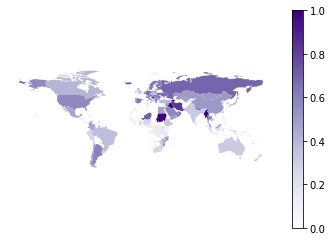

In [19]:
gb = comm2[comm2['community']=='population based']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total, how='left')
gb['Impact'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Impact', cmap='Purples', legend=True, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05}, vmin=0, vmax=1)

plt.axis('off');

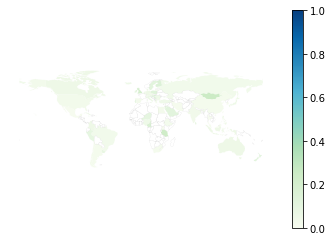

In [20]:
gb = comm2[comm2['community']=='british']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total, how='left')
gb['Impact'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Impact', cmap='GnBu', legend=True, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05}, vmin=0, vmax=1)

plt.axis('off');

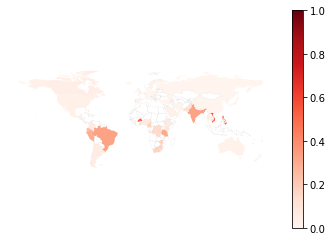

In [21]:
gb = comm2[comm2['community']=='developing country']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total, how='left')
gb['Impact'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Impact', cmap='Reds', legend=True, vmin=0, vmax=1, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05})

plt.axis('off');

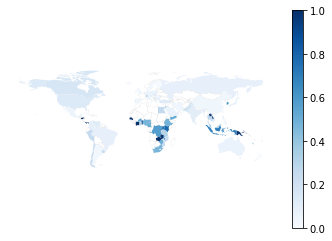

In [22]:
gb = comm2[comm2['community']=='health based']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']

gb = gb.merge(total, how='left')
gb['Impact'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Impact', cmap='Blues', legend=True, vmin=0, vmax=1, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05})

plt.axis('off');

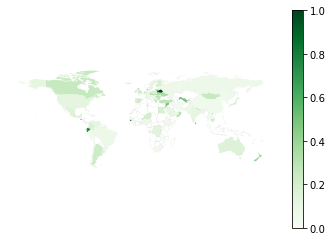

In [23]:
gb = comm2[comm2['community']=='birth/childhood']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total, how='left')
gb['Impact'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Impact', cmap='Greens', legend=True, vmin=0, vmax=1, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05})

plt.axis('off');

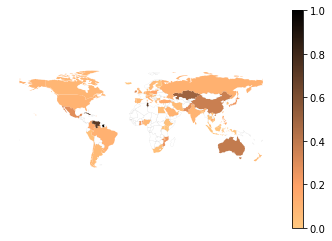

In [24]:
gb = comm2[comm2['community']=='aging']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total, how='left')
gb['Impact'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Impact', cmap='copper_r', legend=True, vmin=0, vmax=1, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05})

plt.axis('off');

## Origin

In [25]:
net = pd.read_csv('../../network/co_citation_nodes.csv')
net = net.dropna(subset=['community'])

In [26]:
comm3 = authors_bb.merge(net[['PaperId', 'community']], how='left').dropna(subset=['community'])

In [27]:
countries_bb = authors_bb.dropna(subset=['Country'])

countries_bb = countries_bb.groupby('PaperId')['Country'].unique().reset_index().explode('Country')

In [28]:
bb = net.merge(countries_bb, how='left')[['PaperId', 'community', 'Year', 'Country']]

In [29]:
total_o = bb.groupby('Country').size().rename('Total').reset_index()

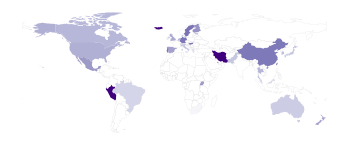

In [30]:
gb = bb[bb['community']=='population based']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total_o, how='left')
gb['Origin'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Origin', cmap='Purples', legend=False, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05}, vmin=0, vmax=1)

plt.axis('off');

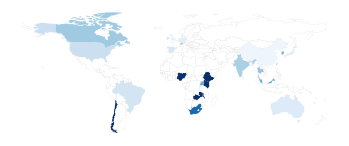

In [31]:
gb = bb[bb['community']=='health based']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total_o, how='left')
gb['Origin'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Origin', cmap='Blues', legend=False, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05}, vmin=0, vmax=1)

plt.axis('off');

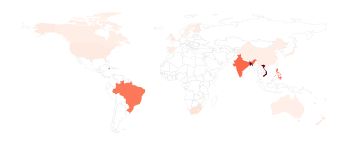

In [32]:
gb = bb[bb['community']=='developing country']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total_o, how='left')
gb['Origin'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Origin', cmap='Reds', legend=False, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05}, vmin=0, vmax=1)

plt.axis('off');

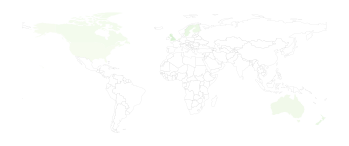

In [33]:
gb = bb[bb['community']=='british']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total_o, how='left')
gb['Origin'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Origin', cmap='GnBu', legend=False, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05}, vmin=0, vmax=1)

plt.axis('off');

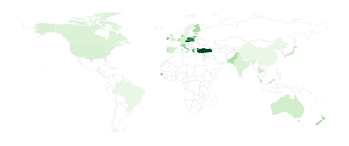

In [34]:
gb = bb[bb['community']=='birth/childhood']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total_o, how='left')
gb['Origin'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Origin', cmap='Greens', legend=False, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05}, vmin=0, vmax=1)

plt.axis('off');

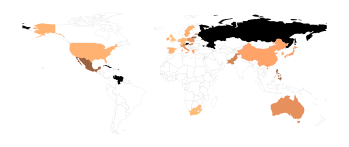

In [35]:
gb = bb[bb['community']=='aging']['Country'].value_counts().reset_index()
gb.columns = ['Country', 'Impact']
gb = gb.merge(total_o, how='left')
gb['Origin'] = gb['Impact'] / gb['Total']

world_pb = world.copy()
world_pb = world_pb.merge(gb, how='left')

world_pb.plot('Origin', cmap='copper_r', legend=False, missing_kwds={"edgecolor": "gray", "color": "white", "linewidth": 0.05}, vmin=0, vmax=1)

plt.axis('off');

## Top 5 countries where biobanks in the community are made and used

In [36]:
made_p = bb.groupby('community')['Country'].apply(lambda x: x.value_counts(normalize=True).head(5)).reset_index()
made_p.columns = ['community', 'Country', 'Proportion']

In [37]:
use_p = comm2.groupby('community')['Country'].apply(lambda x: x.value_counts(normalize=True).head(5)).reset_index()
use_p.columns = ['community', 'Country', 'Proportion']

In [38]:
sns.color_palette(['gray', 'gray', 'gray', 'gray', 'gray', 'gray'])

[(0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)]

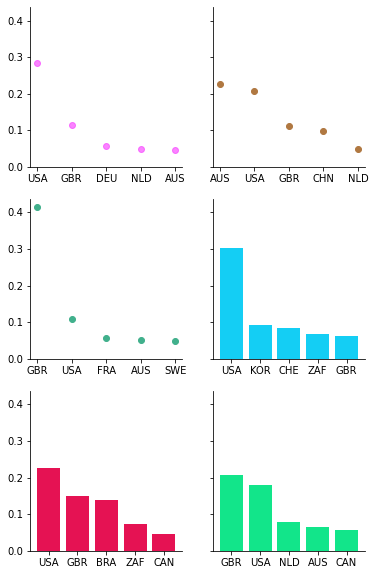

In [39]:
g, ax = plt.subplots(3, 2, figsize=(6, 10), sharey=True)
X = use_p[use_p['community']=='population based']
ax[0][0].scatter(X['Country'], X['Proportion'], color='#F733FF', alpha=0.6)

X = use_p[use_p['community']=='aging']
ax[0][1].scatter(X['Country'], X['Proportion'], color='#B07841')

X = use_p[use_p['community']=='british']
ax[1][0].scatter(X['Country'], X['Proportion'], color='#41B08C')

X = use_p[use_p['community']=='health based']
ax[1][1].bar(X['Country'], X['Proportion'], color='#14CEF4')

X = use_p[use_p['community']=='developing country']
ax[2][0].bar(X['Country'], X['Proportion'], color='#E51253')

X = use_p[use_p['community']=='birth/childhood']
ax[2][1].bar(X['Country'], X['Proportion'], color='#12E58A')
sns.despine()

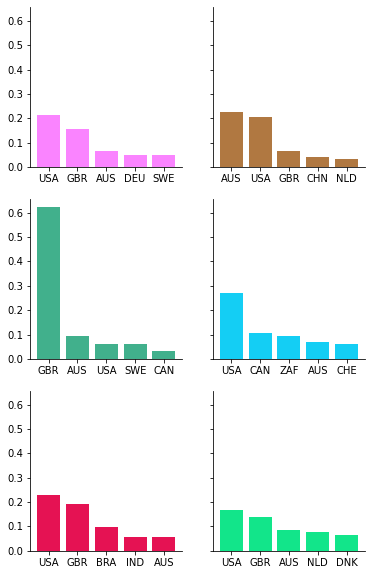

In [40]:
g, ax = plt.subplots(3, 2, figsize=(6, 10), sharey=True)
X = made_p[made_p['community']=='population based']
ax[0][0].bar(X['Country'], X['Proportion'], color='#F733FF', alpha=0.6)

X = made_p[made_p['community']=='aging']
ax[0][1].bar(X['Country'], X['Proportion'], color='#B07841')

X = made_p[made_p['community']=='british']
ax[1][0].bar(X['Country'], X['Proportion'], color='#41B08C')

X = made_p[made_p['community']=='health based']
ax[1][1].bar(X['Country'], X['Proportion'], color='#14CEF4')

X = made_p[made_p['community']=='developing country']
ax[2][0].bar(X['Country'], X['Proportion'], color='#E51253')

X = made_p[made_p['community']=='birth/childhood']
ax[2][1].bar(X['Country'], X['Proportion'], color='#12E58A')
sns.despine()

## Impact per community

In [41]:
cite = pd.read_csv('../../small_data/processed/cites_3.csv')

/home/r.dorantesgilardi/.conda/envs/bb/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
impact = cite[['PaperId', 'CitationCount']]

In [43]:
impact = impact.drop_duplicates()

In [44]:
comm2 = comm2.merge(impact, how='left')

In [45]:
def make_plot(community, ax, color):
    degrees = comm2[comm2['community']==community]['CitationCount'].values
    kmin = min(degrees) + 1
    kmax = max(degrees)

    # Get 10 logarithmically spaced bins between kmin and kmax
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

    # histogram the data into these bins
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    # "x" should be midpoint (IN LOG SPACE) of each bin
    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)

    ax.loglog(x, density, marker='o', linestyle='none', color=color)
    ax.set_xlabel(r"", fontsize=16)
    ax.set_ylabel(r"", fontsize=16)

    # remove right and top boundaries because they're ugly
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [46]:
sns.color_palette(['#14CEF4', '#12E58A', '#F733FF', '#B07841', '#41B08C', '#E51253'])

[(0.0784313725490196, 0.807843137254902, 0.9568627450980393),
 (0.07058823529411765, 0.8980392156862745, 0.5411764705882353),
 (0.9686274509803922, 0.2, 1.0),
 (0.6901960784313725, 0.47058823529411764, 0.2549019607843137),
 (0.2549019607843137, 0.6901960784313725, 0.5490196078431373),
 (0.8980392156862745, 0.07058823529411765, 0.3254901960784314)]

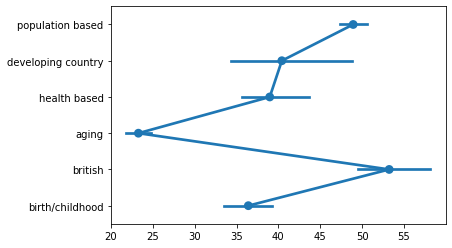

In [47]:
ax = sns.pointplot(data=comm2, y='community', x='CitationCount', showfliers=False)
ax.set_ylabel('')
ax.set_xlabel('');

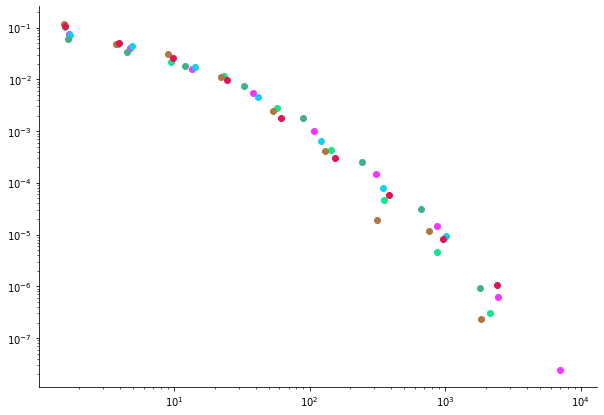

In [48]:
fig, ax = plt.subplots(figsize=(10, 7))
make_plot('population based', ax, '#F733FF')
make_plot('birth/childhood', ax, '#12E58A')
make_plot('health based', ax, '#14CEF4')
make_plot('aging', ax, '#B07841')
make_plot('british', ax, '#41B08C')
make_plot('developing country', ax, '#E51253')

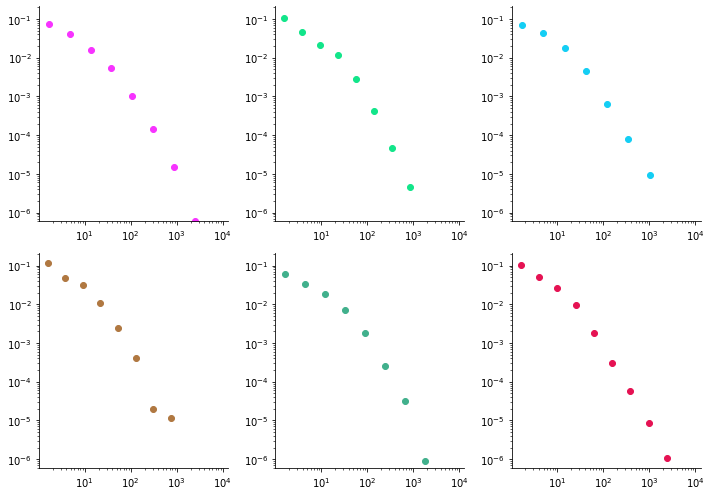

In [209]:
fig, axs = plt.subplots(2, 3, sharex=True, figsize=(10, 7), sharey=True)
make_plot('population based', axs[0][0], '#F733FF')
make_plot('birth/childhood', axs[0][1], '#12E58A')
make_plot('health based', axs[0][2], '#14CEF4')
make_plot('aging', axs[1][0], '#B07841')
make_plot('british', axs[1][1], '#41B08C')
make_plot('developing country', axs[1][2], '#E51253')
plt.tight_layout()